In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Define the possible values for each categorical variable
buying_options = ['high', 'low']
maint_options = ['vhigh', 'low']
door_options = ['2', '3', '4', '5', 'more']
persons_options = ['2', '3', '4', 'more']
boot_options = ['small', 'med', 'big']
safety_options = ['low', 'med', 'high']
class_options = ['good', 'vgood', 'unacc']

# Generate sample data
np.random.seed(0)  # For reproducibility
data = {
    'buying': np.random.choice(buying_options, size=30),
    'maint': np.random.choice(maint_options, size=30),
    'door': np.random.choice(door_options, size=30),
    'persons': np.random.choice(persons_options, size=30),
    'boot': np.random.choice(boot_options, size=30),
    'safety': np.random.choice(safety_options, size=30),
    'class': np.random.choice(class_options, size=30)
}

# Create the DataFrame
df = pd.DataFrame(data)

df.head(3) 

,buying,maint,door,persons,boot,safety,class
0,high,low,5,more,big,high,unacc
1,low,vhigh,5,2,small,med,good
2,low,low,4,4,med,low,good


In [15]:
# Generate random data for the first 9 columns
data = {
    f'Bryan_{i+1}': np.round(np.random.uniform(100.00000, 9999.99999, size=1000), 5) for i in range(9)
}

# Add the target_class column with random 0 or 1
data['target_class'] = np.random.choice([0, 1], size=1000)

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

      Bryan_1     Bryan_2     Bryan_3     Bryan_4     Bryan_5     Bryan_6  \
0  6226.20478   841.46214   716.02324  7867.94338  3277.21427  5929.13230   
1  4801.18840  3695.81838  9892.30091  9788.44158  1454.82478  9570.17663   
2  4754.30867  8255.15628  6984.53279  4254.87975  6765.57224  9598.33540   
3  7189.13785  2826.71011  4375.74169  8882.94687  7032.32143  1228.97292   
4  2951.11094  3748.06051  9205.32672  9343.39694  7554.10346  2439.06513   

      Bryan_7     Bryan_8     Bryan_9  target_class  
0  4245.68188  4138.18633  7571.36738             0  
1  3834.33623  2648.94743  2068.81382             1  
2  4493.62820  4176.30066  8451.59396             1  
3  6071.72804  5171.05188  5783.80044             0  
4  8946.68998  3443.01155  5650.54591             1  


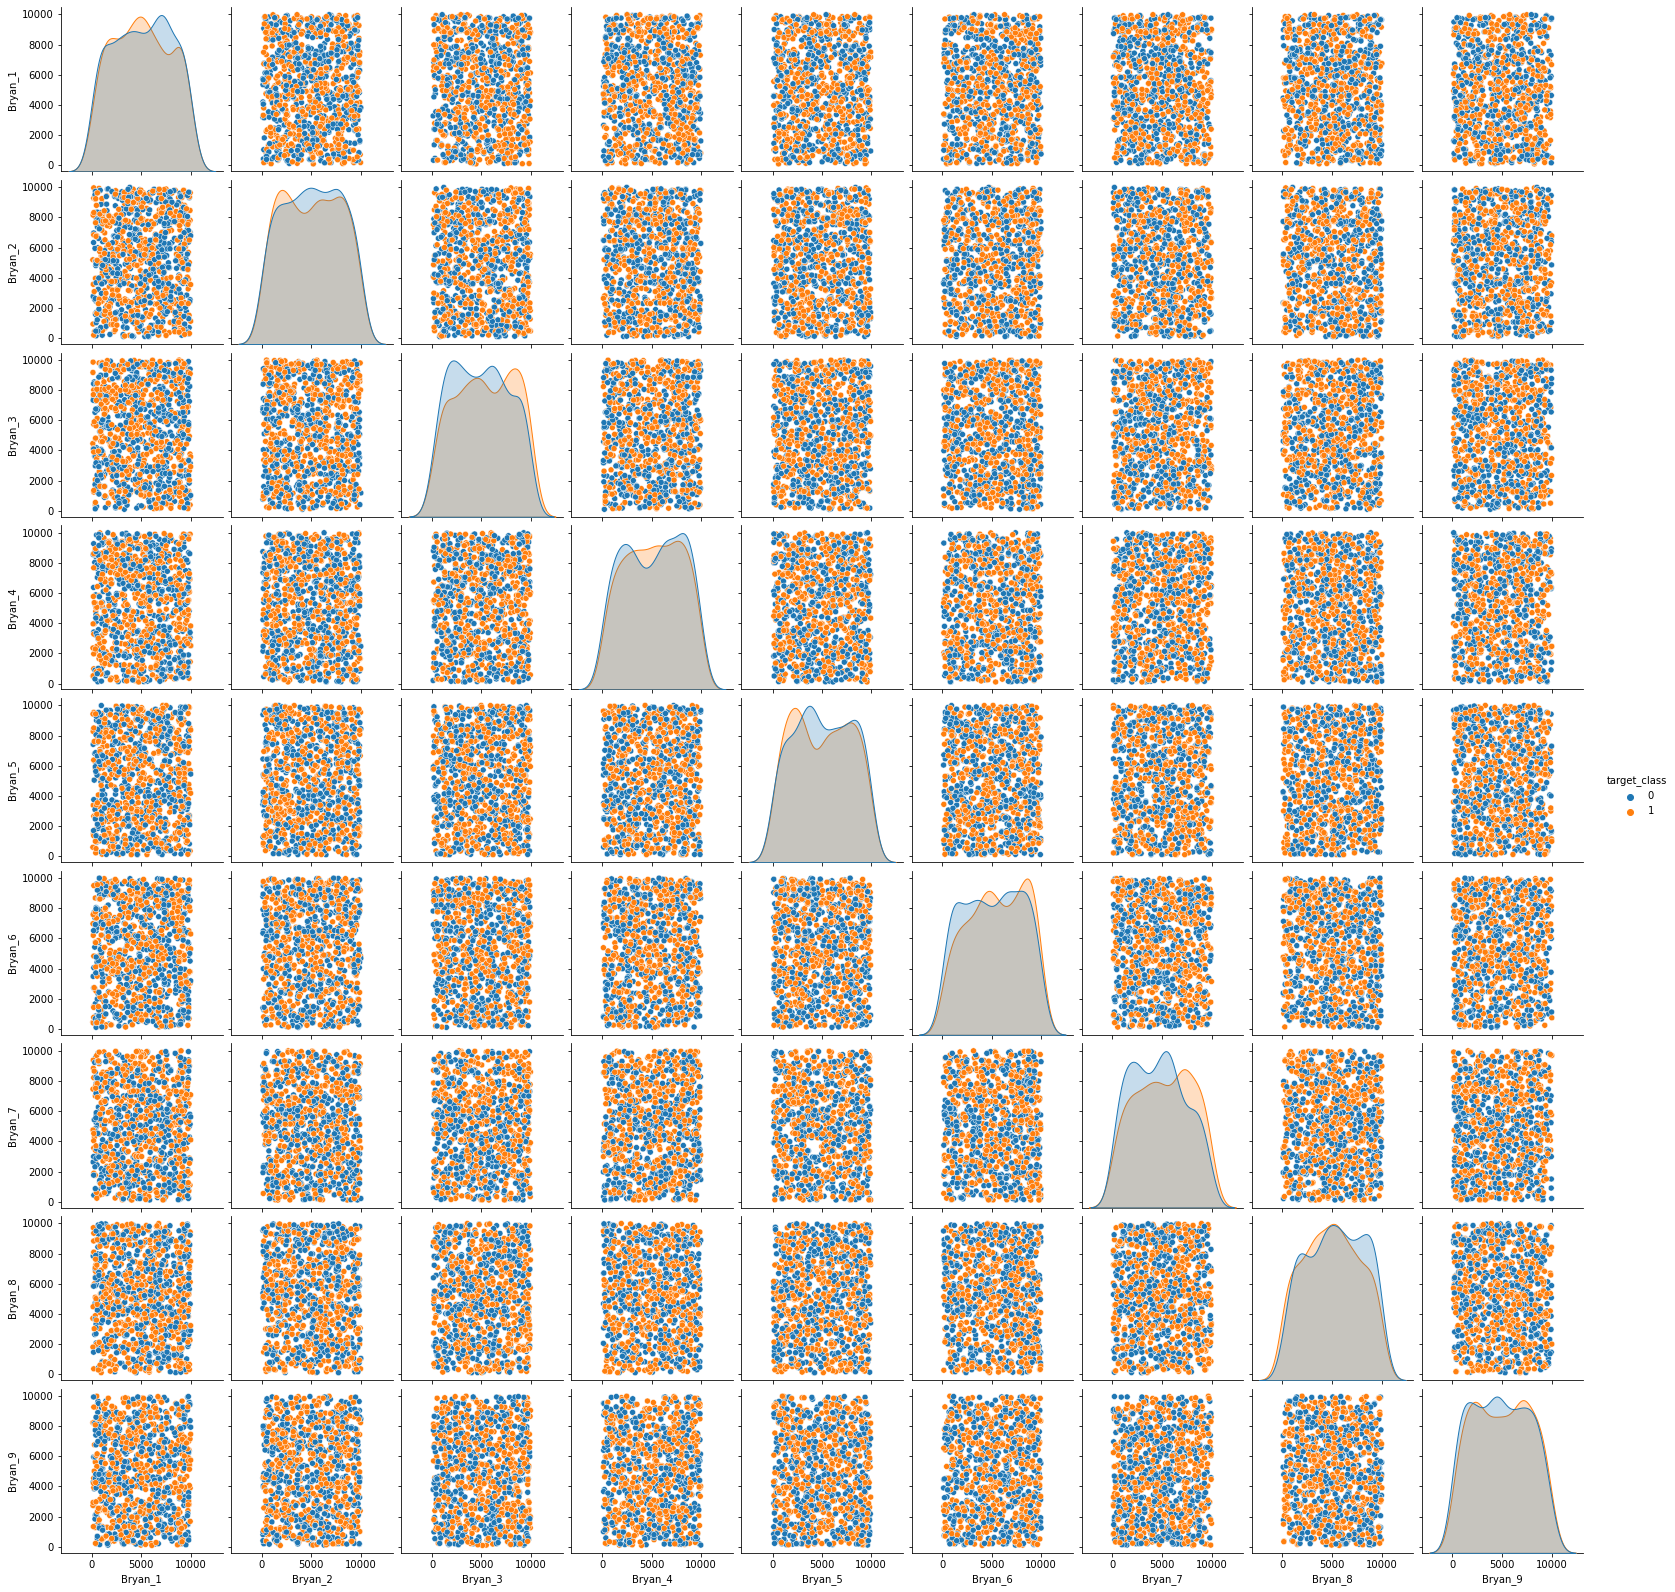

In [16]:
sns.pairplot(df, hue='target_class')

####  Standard the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()

In [19]:
scaler.fit(df.drop('target_class', axis=1))

StandardScaler()

In [20]:
scaled=scaler.transform(df.drop('target_class', axis=1))
scaled

array([[ 0.40478235, -1.46318125, -1.53685511, ..., -0.2399343 ,
        -0.3620745 ,  0.9676766 ],
       [-0.09363626, -0.46697207,  1.65153985, ..., -0.38833257,
        -0.89665919, -0.99754216],
       [-0.11003308,  1.1242989 ,  0.64120499, ..., -0.15048445,
        -0.34839279,  1.2820466 ],
       ...,
       [ 0.57711395, -0.44016196, -1.19028124, ...,  1.68875946,
         1.25134118,  0.614563  ],
       [-0.88862642, -1.45664712, -0.61630838, ...,  1.03300917,
        -0.79052977, -0.88405405],
       [-1.0416133 , -0.75612006,  0.97180697, ...,  0.24680972,
         0.51882712,  0.24060563]])

In [21]:
scaled_feat=pd.DataFrame(scaled, columns=df.columns[:-1])
scaled_feat.head()



,Bryan_1,Bryan_2,Bryan_3,Bryan_4,Bryan_5,Bryan_6,Bryan_7,Bryan_8,Bryan_9
0,0.404782,-1.463181,-1.536855,0.950230,-0.612103,0.228288,-0.239934,-0.362075,0.967677
1,-0.093636,-0.466972,1.651540,1.622687,-1.239267,1.491477,-0.388333,-0.896659,-0.997542
2,-0.110033,1.124299,0.641205,-0.314872,0.588393,1.501246,-0.150484,-0.348393,1.282047
3,0.741581,-0.770303,-0.265247,1.305631,0.680193,-1.402339,0.418836,0.008688,0.329253
4,-0.740726,-0.448739,1.412843,1.466856,0.859761,-0.982521,1.456015,-0.611618,0.281662


In [22]:
X=scaled_feat
y=df['target_class']

In [23]:
print(len(X))
print(len(y))
      

1000
1000


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=123, stratify=y)

In [26]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

600
600
400
400


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
mo_model=KNeighborsClassifier(n_neighbors=1)

In [29]:
mo_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
pred=mo_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[110  94]
 [ 99  97]]
              precision    recall  f1-score   support

           0       0.53      0.54      0.53       204
           1       0.51      0.49      0.50       196

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400



In [33]:
error_rate=[]
for i in range(1,35):
    mo_model=KNeighborsClassifier(n_neighbors=i)
    mo_model.fit(X_train,y_train)
    pred_i=mo_model.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'error rate')

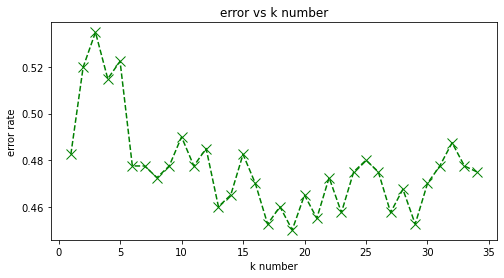

In [34]:
plt.figure(figsize=(8,4))
plt.plot(range(1,35), error_rate, color='green', ls="--", marker="x", markersize=10)
plt.title("error vs k number")
plt.xlabel("k number")
plt.ylabel("error rate")

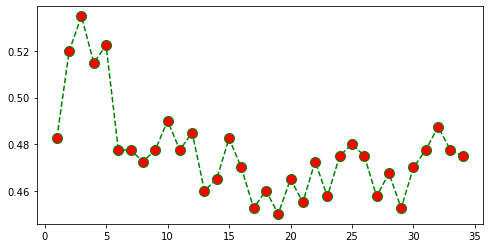

In [35]:
plt.figure(figsize=(8,4))
plt.plot(range(1,35), error_rate, color='green', ls="--", marker="o", markersize=10, markerfacecolor='red')

In [36]:
# Best n =21
mo_model=KNeighborsClassifier(n_neighbors=21)
mo_model.fit(X_train, y_train)
pred=mo_model.predict(X_test)

In [37]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[125  79]
 [103  93]]
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       204
           1       0.54      0.47      0.51       196

    accuracy                           0.55       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.55      0.54       400



c:\Users\Mo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


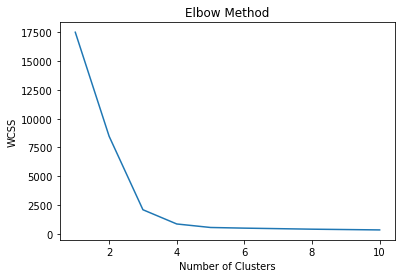

In [38]:
### Optimum K value
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

# Elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the results
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

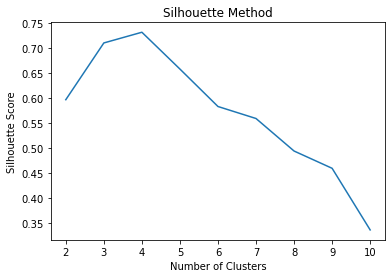

In [39]:
from sklearn.metrics import silhouette_score

# Silhouette method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the results
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()